<a href="https://colab.research.google.com/github/shaina-12/Image-Steganography---Digital-Watermarking-to-Hide-Text-Messages---Networking-5th-Sem-Project/blob/main/ExperimentalCodes/%20LSB_Based_Image_Steganography.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import types
from google.colab.patches import cv2_imshow # google colab crashes if you try to display
#image using cv2.imshow() thus use this import
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#to convert the different types into binary
def messageToBinary(message):
  if (isinstance(message, str)):
    return ''.join([format(ord(i),'08b') for i in message])
  elif (isinstance(message, bytes) or isinstance(message, np.ndarray)):
    return [format(i,'08b') for i in message]
  elif (isinstance(message, int) or isinstance(message, np.uint8)):
    return format(message,'08b')
  else:
    raise TypeError('Input Type Not Supported')

In [ ]:
#to hide secret msg into image
def hideData(image,secret_message):
  #calculate the maximum bytes to encode
  n_bytes = image.shape[0] * image.shape[1] * 3 // 8
  print('Maximum bytes to encode:',n_bytes)
  #check if the number of bytes to encode is less than the maximum bytes in the image
  if (len(secret_message) > n_bytes):
    raise ValueError('Error encountered insufficient bytes, need bigger image or less data!!')
  secret_message += '#####' #you can use any string as a delimeter
  data_index = 0
  #convert input data to binary format using messageToBinary()
  binary_secret_msg = messageToBinary(secret_message)
  data_len = len(binary_secret_msg) #Find the length of data that needs to be hidden
  print(data_len)
  for values in image:
    for pixel in values:
      #convert rgb values to binary format
      r, g, b  = messageToBinary(pixel)
      #modify the lsb only if there is 
      if (data_index < data_len):
        #hide the data into lsb of red pixel
        pixel[0] = int (r[:-1] + binary_secret_msg[data_index], 2)
        data_index += 1
      if (data_index < data_len):
        #hide the data into lsb of green pixel
        pixel[1] = int (g[:-1] + binary_secret_msg[data_index], 2)
        data_index += 1
      if (data_index < data_len):
        #hide the data into lsb of blue pixel
        pixel[2] = int (b[:-1] + binary_secret_msg[data_index], 2)
        data_index += 1
      #if data is encoded just break out of the loop
      if (data_index >= data_len):
        break
  print(data_index)
  return image

In [ ]:
def showData(image):
  binary_data = ''
  for values in image:
    for pixel in values:
      r, g, b = messageToBinary(pixel) #convert the red, green and blue values intpo binary format
      binary_data += r[-1] #extracting data from the lsb of red pixel
      binary_data += g[-1] #extraxting data from the lsb of green pixel
      binary_data += b[-1] #extracting data from the lsb of blue pixel
  print(binary_data)
  #split by 8 bits
  all_bytes = [ binary_data[i: i+8] for i in range(0,len(binary_data),8)]
  #convert from bits into characters
  decoded_data = ''
  for byte in all_bytes:
    decoded_data += chr( int (byte,2))
    if (decoded_data[-5:] == '#####'): #check if we have reached the delimeter which is '#####'
      break
  print(decoded_data)
  return decoded_data[:-5]

In [ ]:
#encode data into image
def encode_text():
  image_name = input('Enter the image name(with extension): ')
  image = cv2.imread('/content/drive/My Drive/Colab Notebooks/'+image_name) # Read the input image using OpenCV-Python.
  #It is a library of Python bindings designed to solve computer vision problems.
  #details of the image
  print("The shape of the image is: ",image.shape) #check the shape of image to calculate the number of bytes in it
  print("The original image is as shown below: ")
  resized_image = cv2.resize(image, (100, 100)) #resize the image as per your requirement
  cv2_imshow(resized_image) #display the image
  data = input("Enter data to be encoded : ") 
  if (len(data) == 0): 
    raise ValueError('Data is empty')
  
  filename = input("Enter the name of new encoded image(with extension): ")
  encoded_image = hideData(image, data) # call the hideData function to hide the secret message into the selected image
  cv2.imwrite('/content/drive/My Drive/Colab Notebooks/'+filename, encoded_image)


In [ ]:
#Decode the data in the image
def decode_text():
  #read the image that contains the hidden image
  image_name = input('Enter the name of the steganographed image that you want to decode (with extension): ')
  image = cv2.imread('/content/drive/My Drive/Colab Notebooks/'+image_name)#read the image using cv2.imread()
  print("The Steganographed image is as shown below: ")
  resized_image = cv2.resize(image, (100, 100))  #resize the original image as per your requirement
  cv2_imshow(resized_image) #display the Steganographed image
  text = showData(image)
  return text

Image Steganography 
 1. Encode the data 
 2. Decode the data 
 Your input is: 2

Decoding....
Enter the name of the steganographed image that you want to decode (with extension): Le.png
The Steganographed image is as shown below: 


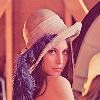

0111001101101000011000010110100101101110011000010010000001101101011001010110100001110100011000010010001100100011001000110010001100100011011111111110100100010101000111100011011111011011000010000111101100110110111000011101111110000100100011000010000111111011010011011111101110000001000100011000111001000110101110101111100100110111000000001001110110011111001000011110101100010111010000000111011011011000010001101000001000100011001011101010111011110100111001100110011101101111010101101101001100111011001110100100101000010010100000110011001001110111001000000000001000110010101001111101011100111110110111111001000000101011110011001000011111011010101001001010010000111111101011010101110111101010010110010001110101010101000110100111111100111110111011101000101000101010011110010101010010011011110101101010001001101011001101011100100001011101010100110110111010010011111010001111111100111100101001101101100011001111010100101010001110110011110100001111001101111111010001101100010111001011011001100000011000111010

In [ ]:
# Image Steganography         
def Steganography(): 
    a = input("Image Steganography \n 1. Encode the data \n 2. Decode the data \n Your input is: ")
    userinput = int(a)
    if (userinput == 1):
      print("\nEncoding....")
      encode_text() 
          
    elif (userinput == 2):
      print("\nDecoding....") 
      print("Decoded message is " + decode_text()) 
    else: 
        raise Exception("Enter correct input") 
          
Steganography() #encode image